In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN = 'train.csv'
TEST = 'test.csv'
df_correct_file = 'df_correct.csv'


In [3]:
df = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [5]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [6]:
# сделаем копию данных, которые будем правитть
df_correct=df.copy()
test_correct = test.copy()

Зададим все нужные для работы функции здесь

In [7]:
def calc_norm_feat(x):
    res = (x - x.min(axis = 0)) / (x.max(axis = 0)-x.min(axis = 0))
    return res

Анализ данных:

In [8]:
def Data_analys(column):
#     Нарисуем данные
    fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
    )
    ax1.hist(column)
    ax2.boxplot(column)
    print(f'максимальное значение  {column.max()}, минимальное значение {column.min()}')
    print(f'среднее - {column.mean()},сигма {column.std()}')
    q1 =column.quantile(0.25)
    q3= column.quantile(0.75)
    inter = q3 - q1
    print(f'медиана - {column.median()}, 1 квантиль {q1}, 3 квантиль {q3}')   
    print('Возможные выбросы снизу ')
    print( column[column<(q1-inter*2)])
    print('Возможные выбросы сверху ')
    print( column[column>(q3+inter*2)])


In [9]:
def data_with_target(column,target):
    plt.scatter(column,target)
    print('корреляция ')
    print (np.corrcoef(column,target))
    print('Коэф кендала  ', pd.DataFrame({'x': column, 'y': target}).corr(method='kendall') ) 
    
    

Посмотрим на таргет

максимальное значение  100.0, минимальное значение 32.0
среднее - 64.3408,сигма 13.53682311024223
медиана - 63.0, 1 квантиль 55.0, 3 квантиль 73.0
Возможные выбросы снизу 
Series([], Name: mean_exam_points, dtype: float64)
Возможные выбросы сверху 
Series([], Name: mean_exam_points, dtype: float64)


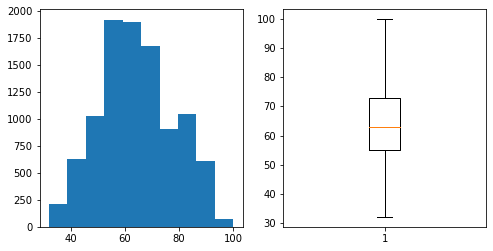

In [10]:
Data_analys(df['mean_exam_points'])


Таргет идеальный

Посмотрим age

максимальное значение  68.0, минимальное значение 23.0
среднее - 45.878,сигма 8.043928547584649
медиана - 46.0, 1 квантиль 40.0, 3 квантиль 51.0
Возможные выбросы снизу 
Series([], Name: age, dtype: float64)
Возможные выбросы сверху 
Series([], Name: age, dtype: float64)


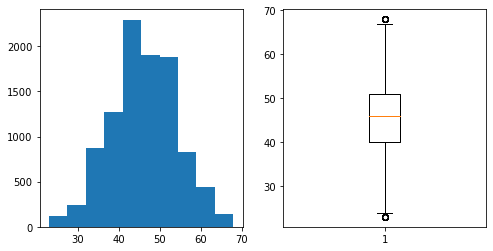

In [11]:
Data_analys(df['age'])


корреляция 
[[ 1.         -0.00764635]
 [-0.00764635  1.        ]]
Коэф кендала             x         y
x  1.000000 -0.005916
y -0.005916  1.000000


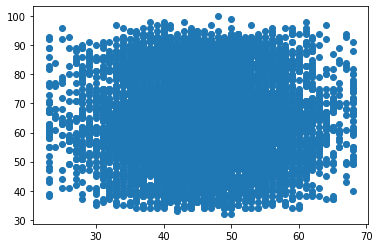

In [12]:
data_with_target(df['age'],df['mean_exam_points'])

Данные читсые, выбросов нет. Связь с таргетом практически отсутвует

Посмотрим на поле years_of_experience Опыт в годах

максимальное значение  10.0, минимальное значение 0.0
среднее - 1.9868,сигма 1.7722132586073134
медиана - 2.0, 1 квантиль 0.0, 3 квантиль 3.0
Возможные выбросы снизу 
Series([], Name: years_of_experience, dtype: float64)
Возможные выбросы сверху 
261    10.0
Name: years_of_experience, dtype: float64


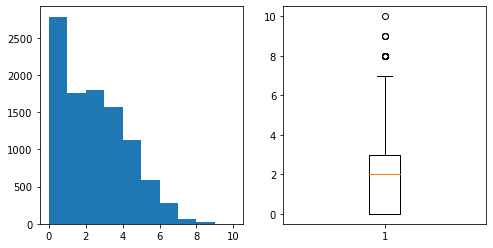

In [13]:
Data_analys(df['years_of_experience'])

корреляция 
[[1.         0.20541739]
 [0.20541739 1.        ]]
Коэф кендала             x         y
x  1.000000  0.122693
y  0.122693  1.000000


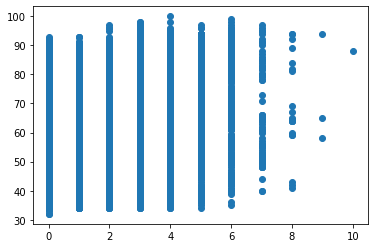

In [14]:
data_with_target(df['years_of_experience'],df['mean_exam_points'])

Опыт 10 лет не будем считать выбросом
Связь как видно очень слабая

Анализируем стоимость занятий (lesson_price)

максимальное значение  3950.0, минимальное значение 200.0
среднее - 1699.105,сигма 524.8866540262864
медиана - 1500.0, 1 квантиль 1300.0, 3 квантиль 2150.0
Возможные выбросы снизу 
Series([], Name: lesson_price, dtype: float64)
Возможные выбросы сверху 
3207    3950.0
Name: lesson_price, dtype: float64


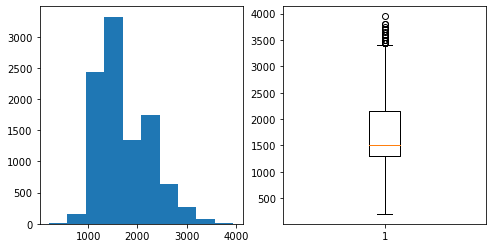

In [15]:
Data_analys(df['lesson_price'])

корреляция 
[[1.         0.72117912]
 [0.72117912 1.        ]]
Коэф кендала             x         y
x  1.000000  0.481413
y  0.481413  1.000000


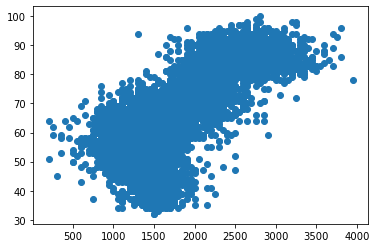

In [16]:
data_with_target(df['lesson_price'],df['mean_exam_points'])

3950.0 - не будем считать выбросом. Связь здесь сильная, более линейная

Анализируем квалификацию (qualification)

максимальное значение  4.0, минимальное значение 1.0
среднее - 1.7195,сигма 0.7922641720107171
медиана - 2.0, 1 квантиль 1.0, 3 квантиль 2.0
Возможные выбросы снизу 
Series([], Name: qualification, dtype: float64)
Возможные выбросы сверху 
Series([], Name: qualification, dtype: float64)


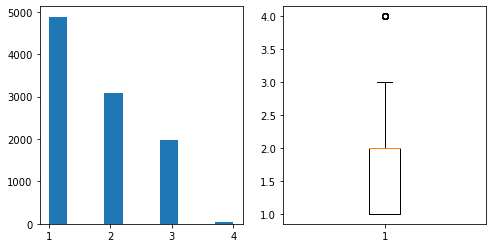

In [17]:
Data_analys(df['qualification'])

корреляция 
[[1.         0.75596287]
 [0.75596287 1.        ]]
Коэф кендала             x         y
x  1.000000  0.592776
y  0.592776  1.000000


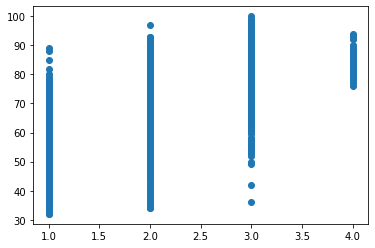

In [18]:
data_with_target(df['qualification'],df['mean_exam_points'])

ПРизнак категориальный , при этом остается значимым  расотяние между данными.
связь существенная как линеная так и не линейная

Физика

In [19]:
df.physics.value_counts()

0.0    6250
1.0    3750
Name: physics, dtype: int64

корреляция 
[[1.         0.18772627]
 [0.18772627 1.        ]]
Коэф кендала             x         y
x  1.000000  0.154893
y  0.154893  1.000000


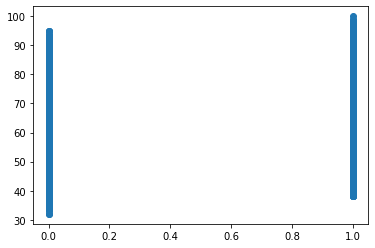

In [20]:
data_with_target(df['physics'],df['mean_exam_points'])

Химия

In [21]:
df.chemistry.value_counts()

0.0    8671
1.0    1329
Name: chemistry, dtype: int64

корреляция 
[[1.         0.01782512]
 [0.01782512 1.        ]]
Коэф кендала             x         y
x  1.000000  0.013942
y  0.013942  1.000000


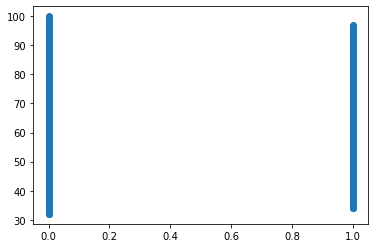

In [22]:
data_with_target(df['chemistry'],df['mean_exam_points'])

Биология

In [23]:
df.biology.value_counts()

0.0    8904
1.0    1096
Name: biology, dtype: int64

корреляция 
[[1.        0.0230216]
 [0.0230216 1.       ]]
Коэф кендала             x         y
x  1.000000  0.021148
y  0.021148  1.000000


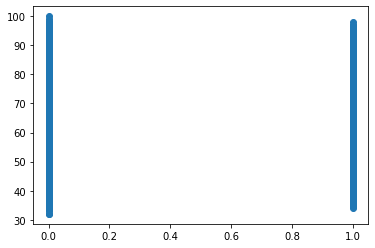

In [24]:
data_with_target(df['biology'],df['mean_exam_points'])

Английский

In [25]:
df.english.value_counts()

0.0    9463
1.0     537
Name: english, dtype: int64

корреляция 
[[1.         0.01317404]
 [0.01317404 1.        ]]
Коэф кендала             x         y
x  1.000000  0.008851
y  0.008851  1.000000


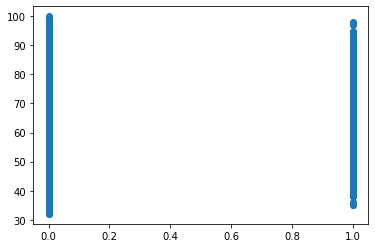

In [26]:
data_with_target(df['english'],df['mean_exam_points'])

In [27]:
df.geography.value_counts()

0.0    9679
1.0     321
Name: geography, dtype: int64

корреляция 
[[1.         0.01440106]
 [0.01440106 1.        ]]
Коэф кендала             x         y
x  1.000000  0.011744
y  0.011744  1.000000


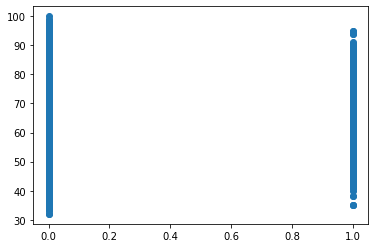

In [28]:
data_with_target(df['geography'],df['mean_exam_points'])

In [29]:
df.history.value_counts() 

0.0    9806
1.0     194
Name: history, dtype: int64

корреляция 
[[ 1.00000000e+00 -1.13294699e-04]
 [-1.13294699e-04  1.00000000e+00]]
Коэф кендала             x         y
x  1.000000 -0.000898
y -0.000898  1.000000


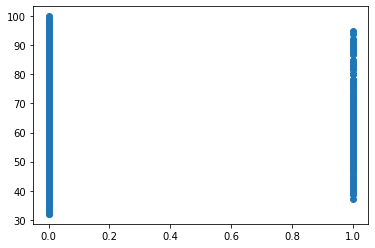

In [30]:
data_with_target(df['history'],df['mean_exam_points'])

Создадим столбец, который суммирует в себе количество предметов, которыми владеет учитель

In [31]:
df_correct['sum_disciplines'] = df.loc[:,'physics':'history'].sum(axis=1)
test_correct['sum_disciplines'] = test.loc[:,'physics':'history'].sum(axis=1)

In [32]:
df_correct.sum_disciplines.value_counts() 

0.0    4377
1.0    4197
2.0    1256
3.0     162
4.0       8
Name: sum_disciplines, dtype: int64

максимальное значение  4.0, минимальное значение 0.0
среднее - 0.7227,сигма 0.7473021852340584
медиана - 1.0, 1 квантиль 0.0, 3 квантиль 1.0
Возможные выбросы снизу 
Series([], Name: sum_disciplines, dtype: float64)
Возможные выбросы сверху 
4350    4.0
6275    4.0
6858    4.0
8132    4.0
8331    4.0
9323    4.0
9366    4.0
9689    4.0
Name: sum_disciplines, dtype: float64


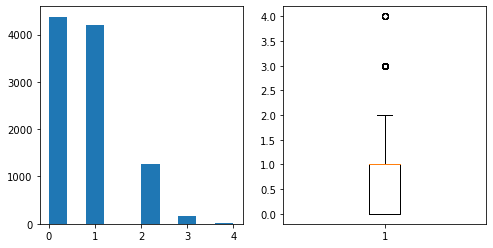

In [33]:
Data_analys(df_correct['sum_disciplines'])

корреляция 
[[1.         0.14669216]
 [0.14669216 1.        ]]
Коэф кендала             x         y
x  1.000000  0.120676
y  0.120676  1.000000


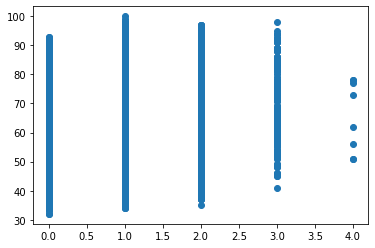

In [34]:
data_with_target(df_correct['sum_disciplines'],df['mean_exam_points'])

Создадим столбец уровень опыта из 4 признаков

In [35]:
def y(x):
    if x==1:
        return 0
    if x<=2:
        return 1
    if x <=3:
        return 2
    return 4

In [36]:
df_correct['level_of_experience']=df['years_of_experience'].apply(y)

In [37]:
test_correct['level_of_experience']=test_correct['years_of_experience'].apply(y)

корреляция 
[[1.        0.2167955]
 [0.2167955 1.       ]]
Коэф кендала            x        y
x  1.00000  0.13473
y  0.13473  1.00000


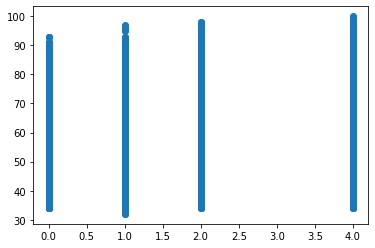

In [38]:
data_with_target(df_correct['level_of_experience'],df['mean_exam_points'])

Создадим столбец уровень стоимостт из 4 признаков

In [39]:
def y2(x):
    if x<1000:
        return 1
    if x<=2000:
        return 2
    if x <=3000:
        return 3
    return 4

In [40]:
df_correct['level_of_lesson_price']=df['lesson_price'].apply(y2)

In [41]:
test_correct['level_of_lesson_price']=test_correct['lesson_price'].apply(y2)

корреляция 
[[1.         0.69708741]
 [0.69708741 1.        ]]
Коэф кендала             x         y
x  1.000000  0.577447
y  0.577447  1.000000


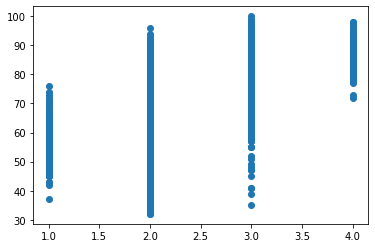

In [42]:
data_with_target(df_correct['level_of_lesson_price'],df['mean_exam_points'])

Создадим столбец рейтинг на основании других важных столбцов с учетом воияния на целевую переменную

In [43]:
test_correct['rating'] = test_correct['level_of_experience']*12+\
test_correct['level_of_lesson_price']*48+\
test_correct['qualification']*59+test_correct['physics']*15\
 +test_correct['chemistry']*10

In [44]:
df_correct['rating'] = df_correct['level_of_experience']*12+\
df_correct['level_of_lesson_price']*48+\
df_correct['qualification']*59+df_correct['physics']*15\
 +df_correct['chemistry']*10

корреляция 
[[1.         0.79720282]
 [0.79720282 1.        ]]
Коэф кендала             x         y
x  1.000000  0.561215
y  0.561215  1.000000


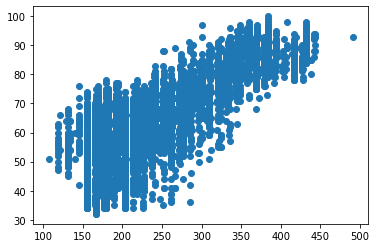

In [45]:
data_with_target(df_correct['rating'],df['mean_exam_points'])

In [46]:
df_correct['norma'] =np.sqrt(df_correct['level_of_experience']**2+\
df_correct['level_of_lesson_price']**2+\
df_correct['qualification']**2)

In [47]:
test_correct['norma'] = np.sqrt(test_correct['level_of_experience']*22+\
test_correct['level_of_lesson_price']**2+\
test_correct['qualification']**2)

корреляция 
[[1.         0.62920426]
 [0.62920426 1.        ]]
Коэф кендала             x         y
x  1.000000  0.444958
y  0.444958  1.000000


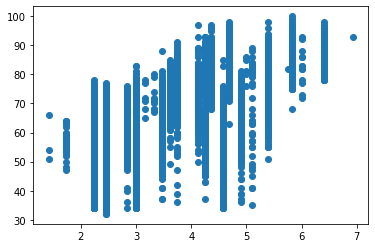

In [48]:
data_with_target(df_correct['norma'],df['mean_exam_points'])

После огромного количесвта испытаний на разных моделях, параметрах и гиперпараметров, выяснилось, что самsй лучий результат дают данные в слкдующей комбинации:
    

In [49]:
a=[ 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
]

Далее я попытался отcчеь выбросы на участак целевой переменной. То есть рассматривать участок например от 60 до 65 и смотреть есть ли там выбросы и удалть их.
Но это то же результата не дало.

In [50]:
df_work = df_correct.copy()
for i in range (30,96,5):
    test = df_work[(df_work['mean_exam_points']>=i)&(df_work['mean_exam_points']<i+5)]
    med = test.median()
    q25=test.quantile(0.25)
    q75 = test.quantile(0.75)
    iq = q75 - q25
    ind = test[(test['years_of_experience']>med['years_of_experience']+2)|(test['years_of_experience']<med['years_of_experience']-2)].index
    df_work =df_work.drop(ind)
    print(i)
    print(df_work.shape)
    test = test.drop(ind)
    ind = test[(test['lesson_price']>q75['lesson_price']+iq['lesson_price']*1.5)|(test['lesson_price']<q25['lesson_price'] - iq['lesson_price']*1.5)].index
    df_work =df_work.drop(ind)
    print(i)
    print(df_work.shape)
    test = test.drop(ind)
    ind = test[(test['qualification']>med['qualification']+1)|(test['qualification']<med['qualification']-1)].index
    df_work =df_work.drop(ind)
    print(i)
    print(df_work.shape)
    test = test.drop(ind)

30
(9996, 17)
30
(9990, 17)
30
(9990, 17)
35
(9956, 17)
35
(9933, 17)
35
(9933, 17)
40
(9902, 17)
40
(9840, 17)
40
(9839, 17)
45
(9746, 17)
45
(9744, 17)
45
(9743, 17)
50
(9670, 17)
50
(9655, 17)
50
(9649, 17)
55
(9552, 17)
55
(9536, 17)
55
(9527, 17)
60
(9299, 17)
60
(9277, 17)
60
(9261, 17)
65
(9028, 17)
65
(9022, 17)
65
(9022, 17)
70
(8973, 17)
70
(8973, 17)
70
(8973, 17)
75
(8867, 17)
75
(8792, 17)
75
(8788, 17)
80
(8582, 17)
80
(8570, 17)
80
(8568, 17)
85
(8425, 17)
85
(8424, 17)
85
(8421, 17)
90
(8385, 17)
90
(8382, 17)
90
(8382, 17)
95
(8378, 17)
95
(8376, 17)
95
(8376, 17)


В итоге самые эффективные, который я смог обнаружить стал изначальный за вычетом трех полей

In [51]:
X_train = df_correct[a]
X_train.to_csv('x_train.csv',index=False)
X_test = test_correct[a]
X_train.to_csv('x_test.csv',index=False)
y_train = df_correct['mean_exam_points']
y_train.to_csv('y_train.csv',index=False)